In [1]:
# coding: utf-8

import xarray as xr
import numpy as np
from glob import glob
import sys
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pickle
import calendar
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.colors as colors
import matplotlib as mpl
import copy
from matplotlib.colors import  ListedColormap

In [2]:
# Opening a dataset just to get the lat/lon of the grid
aux1 = xr.open_dataset('/chinook/marinier/CONUS_2D/CTRL/2000/wrf2d_d01_CTRL_T2_200010-200012.nc', engine='netcdf4') 
#store = '/chinook/cruman/Data/WetSnow'
#auxPlot = f'/{store}/WetSnow_SN_200010-200012.nc'
#auxPlot = xr.open_dataset(auxPlot)
#auxPlot['S_Events'] = (('south_north', 'west_east'), b)
#auxPlot['S_EventsAVG'] = (('south_north', 'west_east'), b/12)

In [3]:
fo = '/chinook/cruman/Data/Near0Events/Distribution'
# Get the average number of hours near 0
l = np.arange(-50,48,4)
xi = 1015 
yi = 1359 
dist = np.zeros((xi, yi, len(l)))
dist_pgw = np.zeros((xi, yi, len(l)))

# Year, Month, Lat, Lon
#for m in range(1,13):
#    l.append([])
t = 0
for i,y in enumerate(range(2000,2014)):
    print(f"Ano {i}")
    for m in range(1,13):
        if y == 2000 and m < 10:
            continue
        if y == 2013 and m > 9:
            continue
        #print(f"Mes: {m}, Ano: {y}")
        sim='CTRL'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        #print(f'{fo}/t2m_{y}_{m:02d}.p')
        dist += aux
        sim = 'PGW'
        aux = pickle.load( open(f'{fo}/dist_{sim}_{y}_{m:02d}.p', 'rb'))
        dist_pgw += aux
        t+= 1
        #print(i, m-1)
        #d_array[m-1].append(aux)
    
print(f"Total # of months: {t}")        

Ano 0
Ano 1
Ano 2
Ano 3
Ano 4
Ano 5
Ano 6
Ano 7
Ano 8
Ano 9
Ano 10
Ano 11
Ano 12
Ano 13
Total # of months: 156


<BarContainer object of 25 artists>

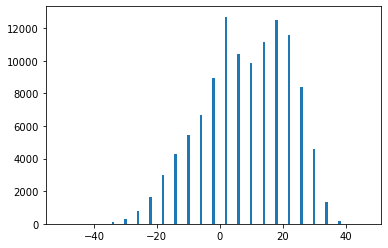

In [6]:
plt.bar(np.arange(-50,48,4), dist[714, 1087])

In [12]:
bin2_gt_m2[714,1087]

1

In [4]:
'''
3 types of pattern:
P1: 
1 at   0 (13)
2 at > 2 (14>12)

P2:
1 at< -2 (12)
2 at   0 (13>14)

P3:
1 at > 2 (14)
2 at   0 (13>12)

P4:
1 at< -2 (12)
2 at > 2 (14>13)
'''

# getting P1 values
maxindex = np.argmax(dist, axis=2)
near0_ctrl = np.where(maxindex==13, True, False)
bin_P1 = np.where((near0_ctrl==1) & (dist[:,:,14] >= dist[:,:,12]), 1, 0)

# getting P2 values
peak_lt_m2_ctrl = np.where(maxindex==12, True, False)
bin_P2 = np.where((peak_lt_m2_ctrl==1) & (dist[:,:,13] >= dist[:,:,14]), 2, 0)

# getting P3 values
peak_gt_2_ctrl = np.where(maxindex==14, True, False)
bin_P3 = np.where((peak_gt_2_ctrl==1) & (dist[:,:,13] >= dist[:,:,12]), 3, 0)

# P4
bin_P4 = np.where((peak_lt_m2_ctrl==1) & (dist[:,:,14] >= dist[:,:,13]), 4, 0)

########
# getting P1 values
maxindex = np.argmax(dist_pgw, axis=2)
near0_pgw = np.where(maxindex==13, True, False)
bin_P1_pgw = np.where((near0_pgw==1) & (dist_pgw[:,:,14] > dist_pgw[:,:,12]), 1, 0)

# getting P2 values
peak_lt_m2_pgw = np.where(maxindex==12, True, False)
bin_P2_pgw = np.where((peak_lt_m2_pgw==1) & (dist_pgw[:,:,13] > dist_pgw[:,:,14]), 2, 0)

# getting P3 values
peak_gt_2_pgw = np.where(maxindex==14, True, False)
bin_P3_pgw = np.where((peak_gt_2_pgw==1) & (dist_pgw[:,:,13] > dist_pgw[:,:,12]), 3, 0)

# P4
bin_P4_pgw = np.where((peak_lt_m2_pgw==1) & (dist_pgw[:,:,14] > dist_pgw[:,:,13]), 4, 0)


In [11]:
'''
New interpretation of the patterns:
P1: 
(13 > 14) & (14 > 12)

P2:
(12 > 13) & (13 > 14)

P3:
(14 > 13) & (13 > 12)

P4:
(12 > 14) & (14 > 13)
'''

# getting P1 values
bin_P1_v2 = np.where((dist[:,:,13] >= dist[:,:,14]) & (dist[:,:,14] >= dist[:,:,12]), 1, 0)

# getting P2 values
bin_P2_v2 = np.where((dist[:,:,12] >= dist[:,:,13]) & (dist[:,:,13] >= dist[:,:,14]), 2, 0)

# getting P3 values
bin_P3_v2 = np.where((dist[:,:,14] >= dist[:,:,13]) & (dist[:,:,13] >= dist[:,:,12]), 3, 0)

# P4
bin_P4_v2 = np.where((dist[:,:,12] >= dist[:,:,14]) & (dist[:,:,14] >= dist[:,:,13]), 4, 0)

# PGW
# getting P1 values
bin_P1_pgw_v2 = np.where((dist_pgw[:,:,13] >= dist_pgw[:,:,14]) & (dist_pgw[:,:,14] >= dist_pgw[:,:,12]), 1, 0)

# getting P2 values
bin_P2_pgw_v2 = np.where((dist_pgw[:,:,12] >= dist_pgw[:,:,13]) & (dist_pgw[:,:,13] >= dist_pgw[:,:,14]), 2, 0)

# getting P3 values
bin_P3_pgw_v2 = np.where((dist_pgw[:,:,14] >= dist_pgw[:,:,13]) & (dist_pgw[:,:,13] >= dist_pgw[:,:,12]), 3, 0)

# P4
bin_P4_pgw_v2 = np.where((dist_pgw[:,:,12] >= dist_pgw[:,:,14]) & (dist_pgw[:,:,14] >= dist_pgw[:,:,13]), 4, 0)


In [12]:
possibilities_ctrl_v2 = (bin_P1_v2+bin_P2_v2+bin_P3_v2+bin_P4_v2).astype(float)
possibilities_ctrl_v2 = np.ma.array(possibilities_ctrl_v2, mask=possibilities_ctrl_v2 == 0)
#possibilities_ctrl[possibilities_ctrl==0] = np.nan
possibilities_pgw_v2 = (bin_P1_pgw_v2+bin_P2_pgw_v2+bin_P3_pgw_v2+bin_P4_pgw_v2).astype(float)
possibilities_pgw_v2 = np.ma.array(possibilities_pgw_v2, mask=possibilities_pgw_v2 == 0)
#possibilities_pgw[possibilities_pgw==0] = np.nan

In [13]:
aux1['possibilities_ctrl_v2'] = (('south_north', 'west_east'), possibilities_ctrl_v2)
aux1['possibilities_pgw_v2'] = (('south_north', 'west_east'), possibilities_pgw_v2)

In [8]:
xll, yll = aux1.XLONG.values[0, 0],aux1.XLAT.values[0, 0]
xur, yur = aux1.XLONG.values[-1, -1],aux1.XLAT.values[-1, -1]

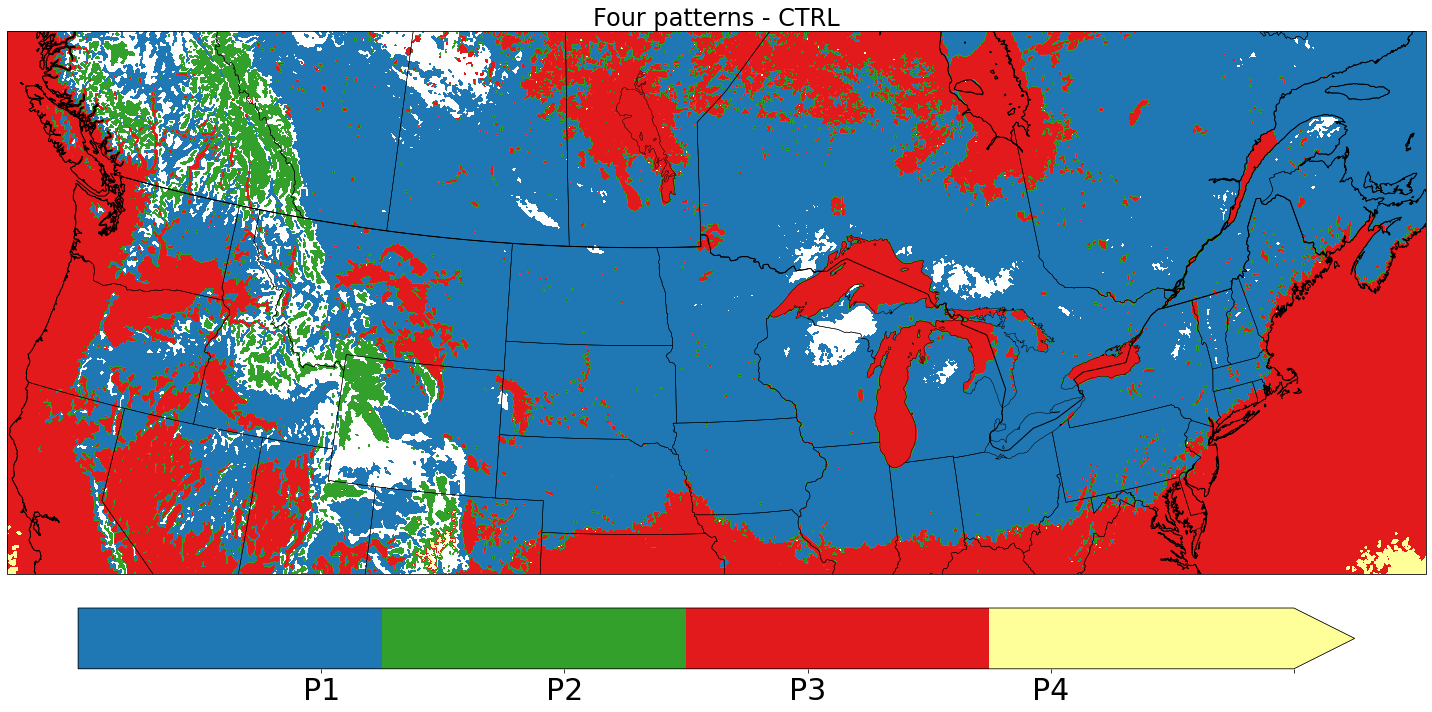

In [14]:
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 5 #np.max(aux1['total_day'].values)
val_min = 1
val_int = 1
#new_cmap = plt.cm.jet
cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)
unit = ""
title = r"Four patterns - CTRL"

ax.set_extent([xll, xur-10, 36, yur])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=4)
# Plot figure
cs = aux1['possibilities_ctrl_v2'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30) 
cb.ax.set_xticklabels(['P1', 'P2', 'P3', 'P4', ' '])
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('possibilities_4patterns_ctrl_v2.png')
#plt.show()

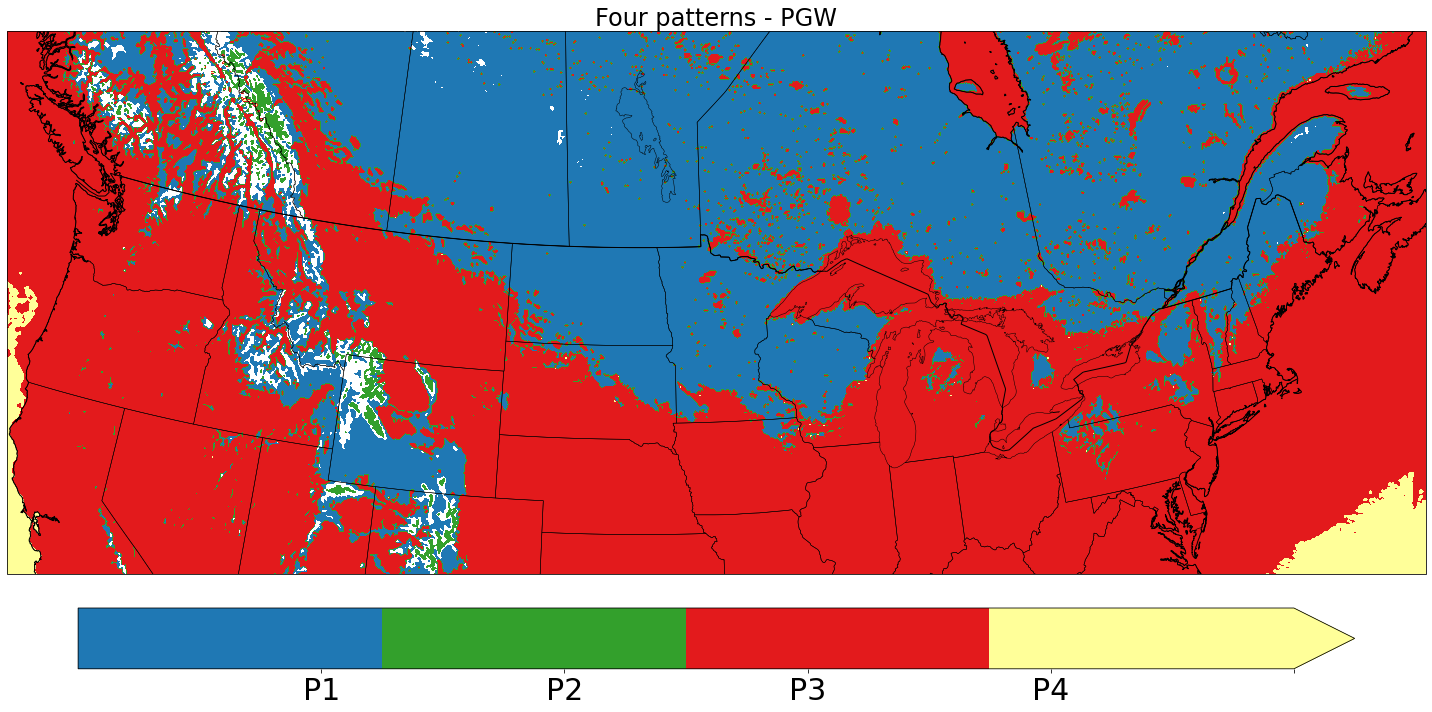

In [15]:
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 5 #np.max(aux1['total_day'].values)
val_min = 1
val_int = 1
#new_cmap = plt.cm.jet
cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
new_cmap = mpl.colors.ListedColormap(cor)
unit = ""
title = r"Four patterns - PGW"

ax.set_extent([xll, xur-10, 36, yur])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=4)
# Plot figure
cs = aux1['possibilities_pgw_v2'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30) 
cb.ax.set_xticklabels(['P1', 'P2', 'P3', 'P4', ' '])
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('possibilities_4patterns_pgw_v2.png')
#plt.show()

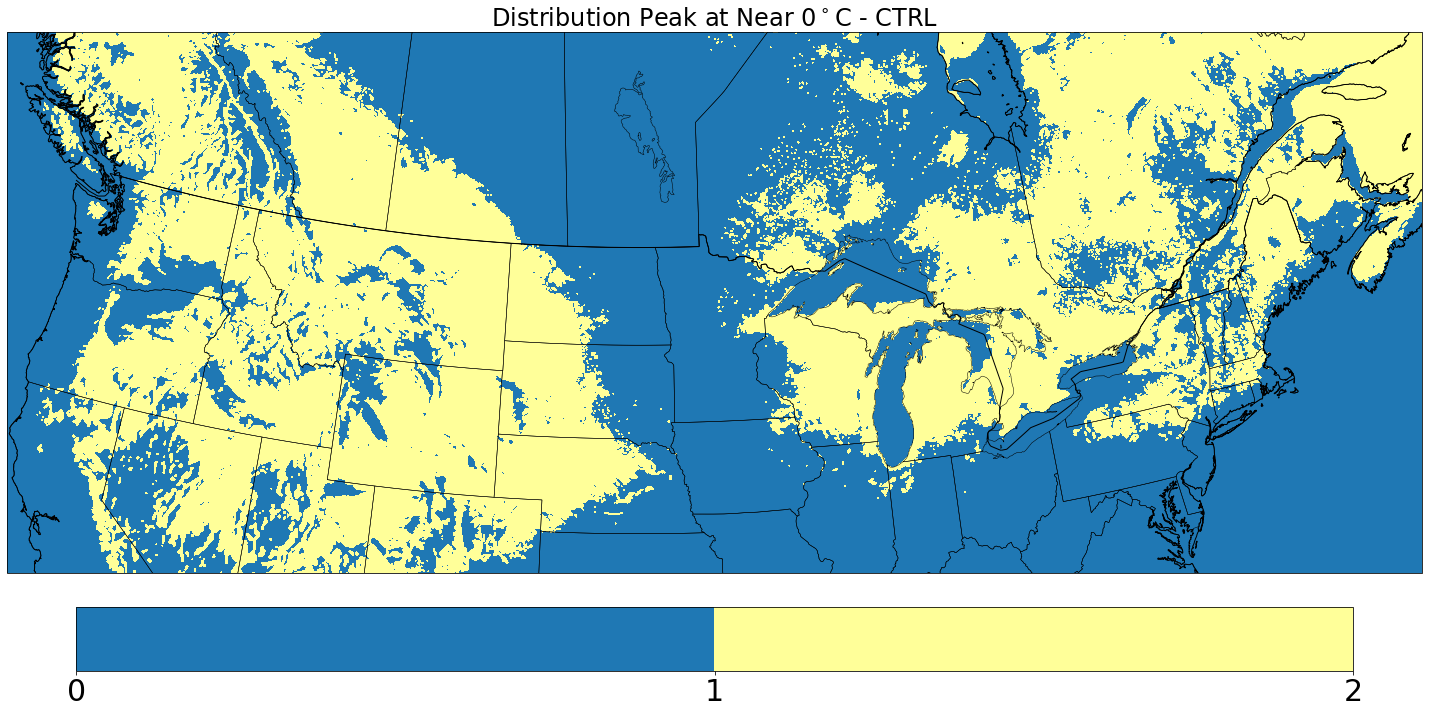

In [39]:
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, ax = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': myLambert})

width = 1.0  
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 2 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 1
#new_cmap = plt.cm.jet
cor = ['#8dd3c7','#ffffb3','#bebada','#fb8072']
cor = ['#1f78b4', '#33a02c', '#e31a1c', '#ffff99']
#cor = ['#ef8a62', '#67a9cf']
new_cmap = mpl.colors.ListedColormap(cor)
unit = ""
title = r"Distribution Peak at Near 0${\rm ^\circ C}$ - CTRL"

ax.set_extent([xll, xur-10, 36, yur])

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)
# Plot figure
cs = aux1['ctrl'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
           add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9)
cb.ax.set_title(unit, fontsize=30)
cb.ax.tick_params(labelsize=30) 
#cb.ax.set_xticklabels(['c1p1', 'c1p0', 'c0p1', 'c0p0', ' '])
# Plot title
ax.set_title(title, fontsize=24)

ax.coastlines(resolution='10m', linewidth=width)
ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
#ax.add_feature(cfeature.OCEAN, zorder=10)

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('possibilities_ctrl.png')
#plt.show()

In [22]:
aux1['ctrl']

<xarray.DataArray 'ctrl' (south_north: 1015, west_east: 1359)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])
Coordinates:
    XLAT     (south_north, west_east) float32 18.14 18.15 18.15 ... 52.43 52.42
    XLONG    (south_north, west_east) float32 -122.9 -122.8 ... -57.0 -56.95
Dimensions without coordinates: south_north, west_east

<ipython-input-14-8df7b9cbbea6>:44: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = f.colorbar(cs, cax=cbar_ax, ticks=color_ticks, orientation='horizontal',pad=0.05,shrink=0.9, extend="both")
<ipython-input-14-8df7b9cbbea6>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


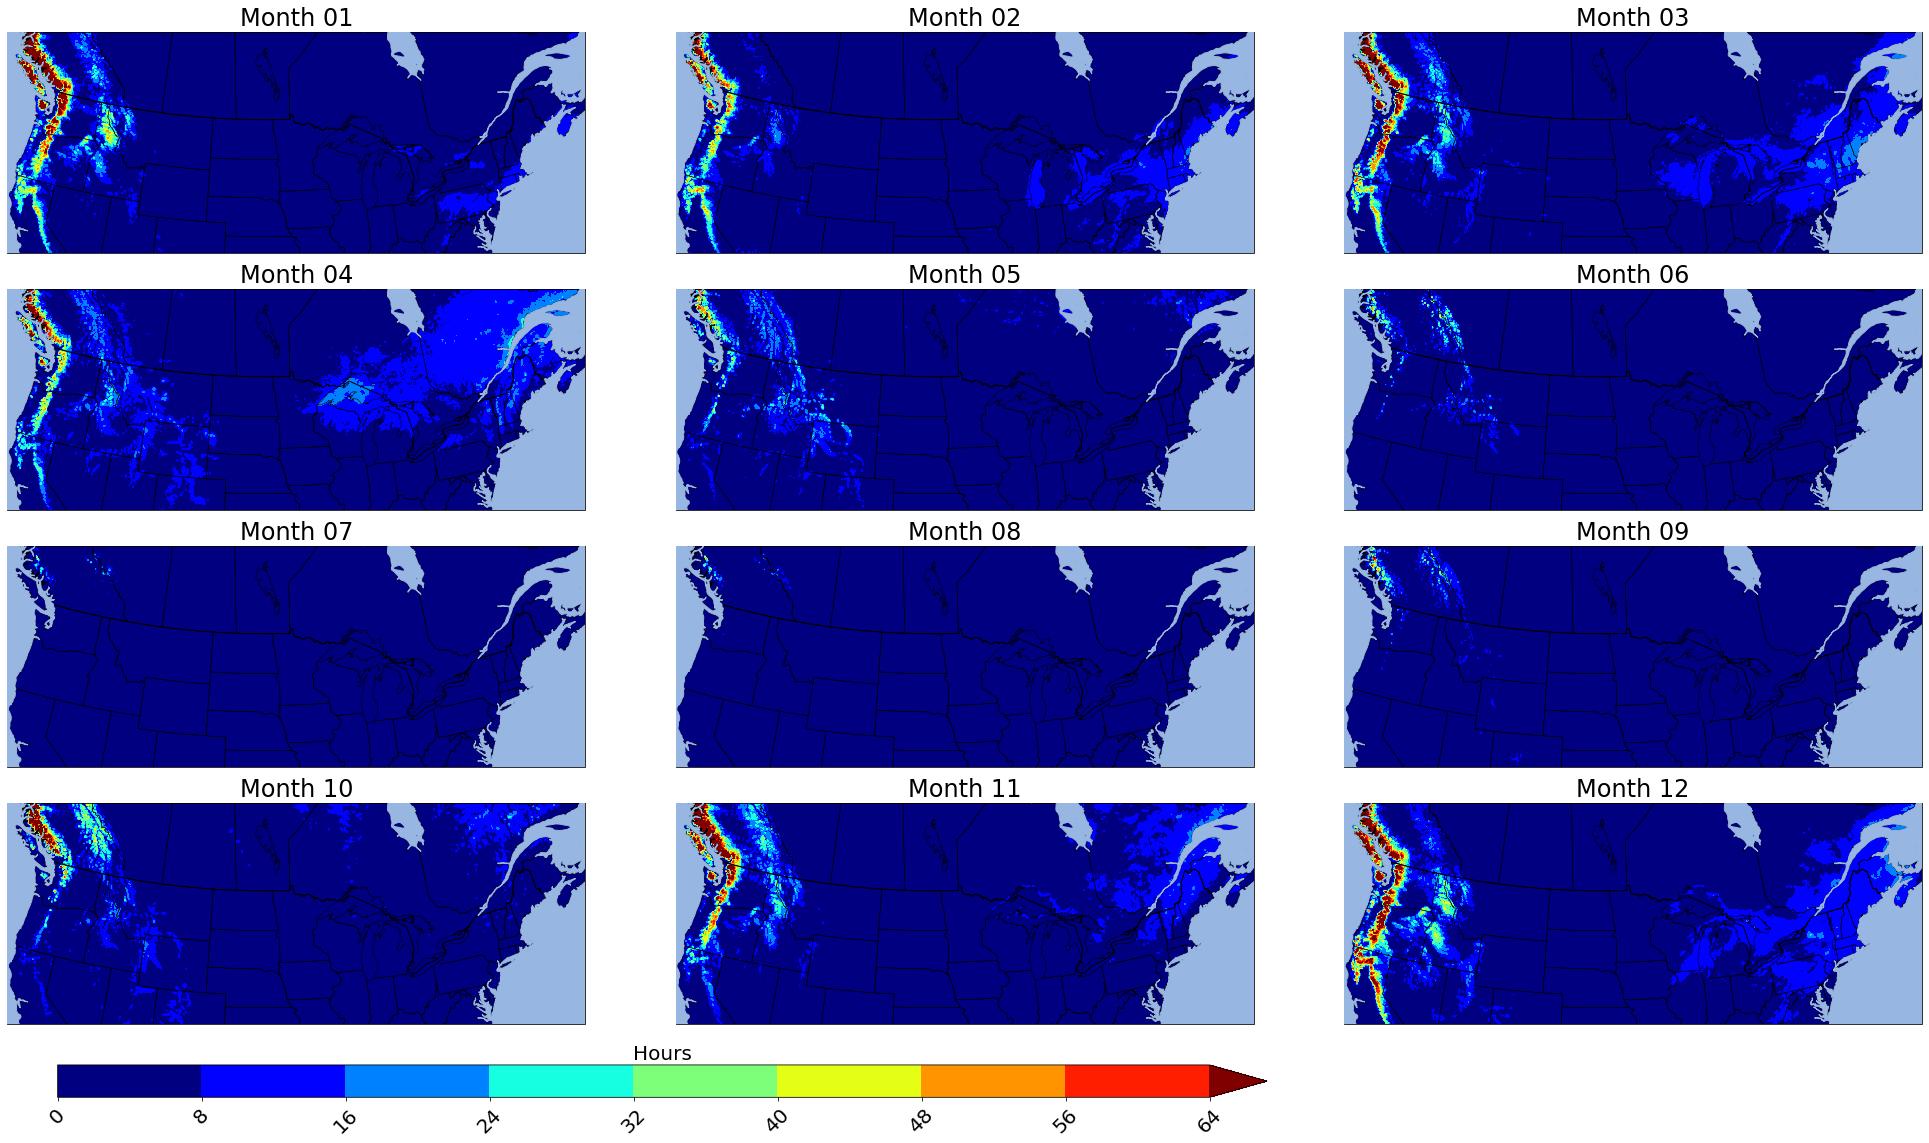

In [14]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, axs = plt.subplots(5, 3, figsize=(28, 18), subplot_kw={'projection': myLambert})

width = 1.0  
new_cmap = 'viridis_r'
new_cmap = mpl.cm.get_cmap("viridis_r")
#new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
#new_cmap.set_bad(color='white')

val_max = 64 #np.max(aux1['total_day'].values)
val_min = 0
val_int = 8
new_cmap = plt.cm.jet
unit = "Hours"
title = r"Average monthly number of Hour with near 0 ${\rm ^\circ C}$. 10-2000 to 09-2013"

ints = ( (val_max-val_min+val_int) / val_int)
color_bnds  = np.linspace(val_min, val_max, int(ints))
color_ticks = np.linspace(val_min, val_max, int(ints))
norm = colors.BoundaryNorm(boundaries=color_bnds, ncolors=256)

for i, ax in enumerate(axs.flat):
    if i > 11:
        f.delaxes(ax)
        continue
    ax.set_extent([xll, xur-10, 36, yur])

# Plot figure
    cs = aux1[f'total_month_{i:02d}'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
               add_colorbar=False, cmap=new_cmap, levels=int(ints), vmin=0, vmax=val_max, extend='max')
    
    ax.coastlines(resolution='10m', linewidth=width)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)
    ax.set_title(f"Month {i+1:02d}", fontsize=24)
#cs = ax.pcolormesh(lon, lat, var[i],norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
#cs = plt.contourf(lon, lat, field,norm=norm,cmap=cmap,transform=ccrs.PlateCarree())
# Plot colorbar
cbar_ax = f.add_axes([0.05, 0.15, 0.6, 0.025])
cb = f.colorbar(cs, cax=cbar_ax, ticks=color_ticks, orientation='horizontal',pad=0.05,shrink=0.9, extend="both")
#cb = plt.colorbar(mappable=cs,ticks=color_ticks,orientation="horizontal",pad=0.05,shrink=0.9, extend="both")
cb.ax.set_title(unit, fontsize=20)
cb.ax.tick_params(labelsize=20, labelrotation=45) 
# Plot title

#ax.set_title(f"Month: {i+1:02d}", fontsize=20)

plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
#cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
#cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
#cb.set_label('Number of Events', size=36)
#cbar_ax.tick_params(labelsize=30) 

plt.savefig('near_zero_hours_monthly_pr1_t.png')
#plt.show()

In [ ]:
# Plotting Monthly Events
myLambert = ccrs.LambertConformal(central_longitude=-98.0, central_latitude=39.700012)

  # Making the subplots
f, axs = plt.subplots(5, 3, figsize=(14, 20), subplot_kw={'projection': myLambert})

width = 1.0  
new_cmap = 'viridis_r'
#new_cmap = mpl.cm.get_cmap("viridis_r")
new_cmap = copy.copy(mpl.cm.get_cmap("viridis_r"))
new_cmap.set_bad(color='white')

for i, ax in enumerate(axs.flat):        
    #ax.set_extent([-69.5, -63.5, 45, 48.2])
    if i >= 12:
        f.delaxes(ax)
        continue
        
    # Masking values == 0
    im = auxPlot[f'PR_Events{i+1:02d}'].plot.contourf(ax=ax, transform=ccrs.PlateCarree(), x='XLONG', y='XLAT',
               add_colorbar=False, cmap=new_cmap, levels=7, vmin=0, vmax=6, extend='max')

    ax.coastlines(resolution='10m', linewidth=width)
    ax.add_feature(cfeature.BORDERS.with_scale("10m"), linewidth=width)
    ax.add_feature(cfeature.STATES.with_scale("10m"), linewidth=width/2)
    ax.add_feature(cfeature.OCEAN, zorder=10)

    ax.set_title(f"Month: {i+1:02d}", fontsize=20)


plt.tight_layout()    
#cbar_ax = f.add_axes([0.92, 0.20, 0.025, 0.6])
cbar_ax = f.add_axes([0.20, 0.15, 0.6, 0.025])
cb = f.colorbar(im, cax=cbar_ax, orientation='horizontal')
cb.set_label('Number of Events', size=36)
cbar_ax.tick_params(labelsize=30) 

plt.savefig('PRevents_plot_avg_monthly.png')
#plt.show()